## Data Validation



In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [286]:
#Create base dataframe

df = pd.read_csv('/content/drive/MyDrive/AI & Data Science/Data Science/DS professional project/recipe_site_traffic_2212.csv')
display(df.head())

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


This data set has 895 rows and 8 columns. I have validated all variables and I have corrected errors that were found in some of them as I describe here:

*   recipe: no missing values were found in this numeric type variable and unique value as expected. No cleaning was needed.
*   calories: 52 missing values were found, those rows were eliminated, it's a numeric type as expected
*   carbohydrate: 52 missing values were found, those rows were eliminated, numeric type as indicated
*   sugar: 52 missing values were found, those rows were eliminated, numeric type as indicated
*   protein: 52 missing values were found, those rows were eliminated, numeric type as indicated
*   category: no missing values were found, is a category type variable as indicated. 11 categories were found of 10 possible groupings as indicated, an additional category "Chicken Breast" was found. This category was replaced with "Chicken" category
*   servings: no missing values were found, some values were mixed with strings that were cleaned and data type was transformed to numeric as indicated.
*   high_traffic: 373 missing values were found, those values were replaced with a category named "Low"




In [288]:
# Check for uniqueness in "recipe" variable as identifier
df['recipe'].nunique()

947

In [289]:
# Missing values in calories, carbohydrate, sugar, protein
print('calories null values: ', df['calories'].isna().sum()) # Check for null values and values statistical description for "calories" variable
print('carbohydrate null values: ', df['carbohydrate'].isna().sum()) # Check for null values and values statistical description for "carbohydrate" variable
print('sugar null values: ', df['sugar'].isna().sum())# Check for null values and values statistical description for "sugar" variable
print('protein null values: ', df['protein'].isna().sum()) # Check for null values and values statistical description for "protein" variable
print(df.describe())

calories null values:  52
carbohydrate null values:  52
sugar null values:  52
protein null values:  52
           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


In [290]:
#Dealing with missing values in features 'calories', 'carbohydrate', 'sugar', 'protein'
df_no_null = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
print(df_no_null.shape)

(895, 8)


In [291]:
#Categories in "category" variable
df_no_null['category'].value_counts()

category
Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: count, dtype: int64

In [292]:
# Replace "Chicken Breast" category with "Chicken"

df_no_null.loc[(df_no_null['category'] == "Chicken Breast", 'category')] = 'Chicken'

df_no_null['category'].value_counts()

category
Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: count, dtype: int64

In [293]:
# Change "servings" variable type to numeric

df_no_null['servings'].value_counts()

servings
4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

In [294]:
# Cleaning data in "servings" column, extracting strings in aphanumeric inputs and transform type to numeric

df_no_null.loc[:,'servings'] = df_no_null['servings'].str.extract('(\d+)', expand = False)
clean_data = df_no_null.copy()
clean_data['servings'] = pd.to_numeric(clean_data['servings'])
clean_data['servings'].describe()

count    895.000000
mean       3.458101
std        1.735979
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: servings, dtype: float64

In [295]:
# Impute missing values "high_Traffic" variable
print('high_traffic missing values: ', clean_data['high_traffic'].isna().sum())
clean_data['high_traffic'] = clean_data['high_traffic'].fillna('Low')
clean_data['high_traffic'].value_counts()

high_traffic missing values:  360


high_traffic
High    535
Low     360
Name: count, dtype: int64

## Exploratory Data Analysis


### Target variable - high_traffic

A high traffic to the website is our prediction goal, so "high_traffic" is the target variable.
From the histogram below we can see that there's an acceptable class balance and the target variable is binary

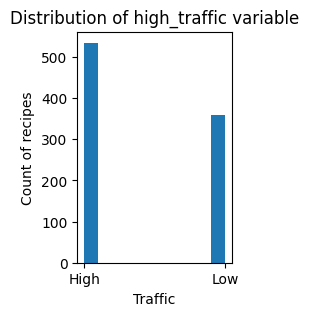

In [296]:
# Analyze "high_traffic" variable distribution
clean_data['high_traffic'].value_counts()
plt.subplots(figsize=(2,3))
plt.hist(clean_data['high_traffic'])
plt.xlabel('Traffic')
plt.ylabel('Count of recipes')
plt.title('Distribution of high_traffic variable')
plt.show()

### "Category" variable composition analysis

Almost all categories are evenly distributed, except the "Chicken" category that has more representation in the data set, 18% of the recipes are categorized as chicken.

        category  proportion
0        Chicken    0.182123
1      Breakfast    0.118436
2      Beverages    0.102793
3         Potato    0.092737
4   Lunch/Snacks    0.091620
5      Vegetable    0.087151
6        Dessert    0.086034
7           Meat    0.082682
8           Pork    0.081564
9  One Dish Meal    0.074860


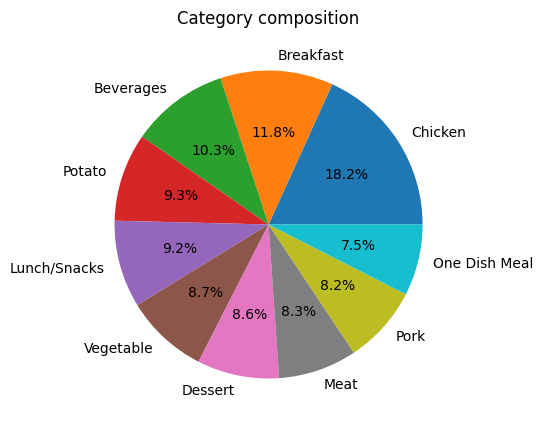

In [297]:
# Analyze composition of category variable
category_proportions = pd.DataFrame(clean_data['category'].value_counts(normalize=True).reset_index())
print(category_proportions)
plt.subplots(figsize=(5,5))
plt.title('Category composition')
plt.pie(category_proportions['proportion'], labels=category_proportions['category'], autopct="%1.1f%%")
plt.show()

### Outliers analysis for numeric variables

As it's shown in the boxplot graphics, all four numeric variables ('calories', 'carbohydrate', 'sugar', 'protein') have outliers. This indicates that these variables must be standarized prior training a model with them.

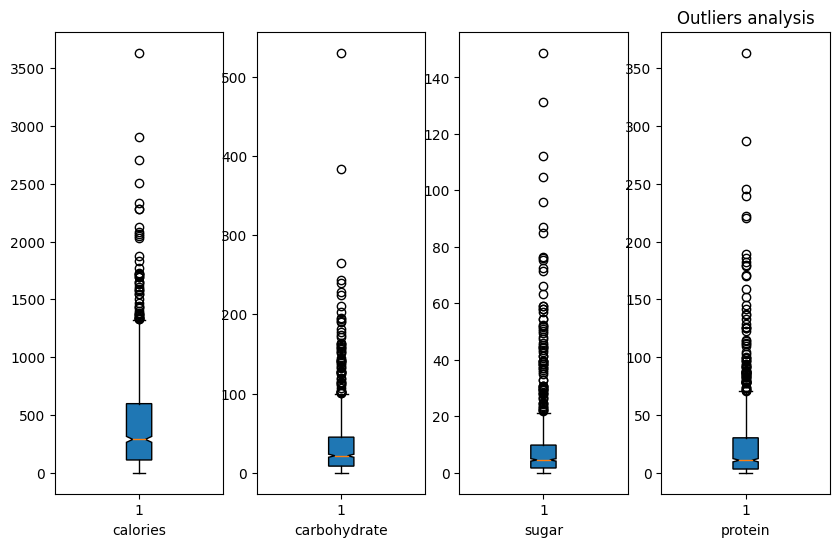

In [312]:
# List of variables to plot (adjust as needed)
variables_to_plot = ['calories', 'carbohydrate', 'sugar', 'protein']

# Create the figure and axes
fig, ax = plt.subplots(1,4,figsize=(10, 6))

# Generate boxplots
ax[0].boxplot(clean_data[variables_to_plot[0]], notch=True, vert=True, patch_artist=True)
ax[1].boxplot(clean_data[variables_to_plot[1]], notch=True, vert=True, patch_artist=True)
ax[2].boxplot(clean_data[variables_to_plot[2]], notch=True, vert=True, patch_artist=True)
ax[3].boxplot(clean_data[variables_to_plot[3]], notch=True, vert=True, patch_artist=True)


# Set labels and title
for i in range(len(variables_to_plot)):
  ax[i].set_xlabel(variables_to_plot[i])
  # ax[i].xticks([1], variables_to_plot[i])  # Adjust tick positions based on variable list

plt.title(f'Outliers analysis')
plt.show()

### Relationship between numeric and target variable



#### Relationship between high_trafic and calories, carbohydrate, sugar, protein, servings

- Only sugar have positive relation with the target variable
- Calories, carbohydrate, Protein and servings variables have negative relation with the target variable
- There is no linear relation between numeric variables and target
- There are no highly correlated features (No Multicollinearity)

In [299]:
# Encode target variable
le = LabelEncoder()

clean_data['high_traffic_encoded'] = le.fit_transform(clean_data['high_traffic'])
clean_data = clean_data.drop(columns=['high_traffic'])
corr_matrix = clean_data[['high_traffic_encoded', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings']].corr()

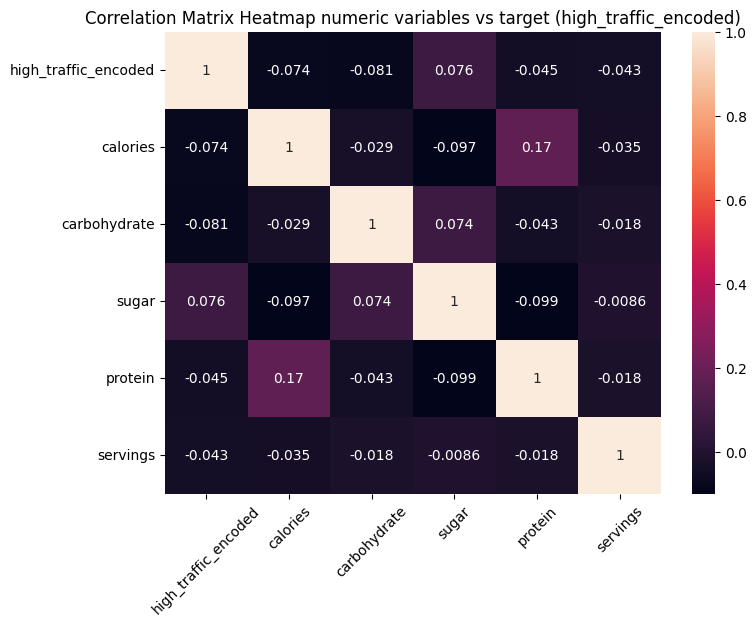

In [300]:
# # Heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap numeric variables vs target (high_traffic_encoded)')
plt.xticks(rotation=45)
plt.show()

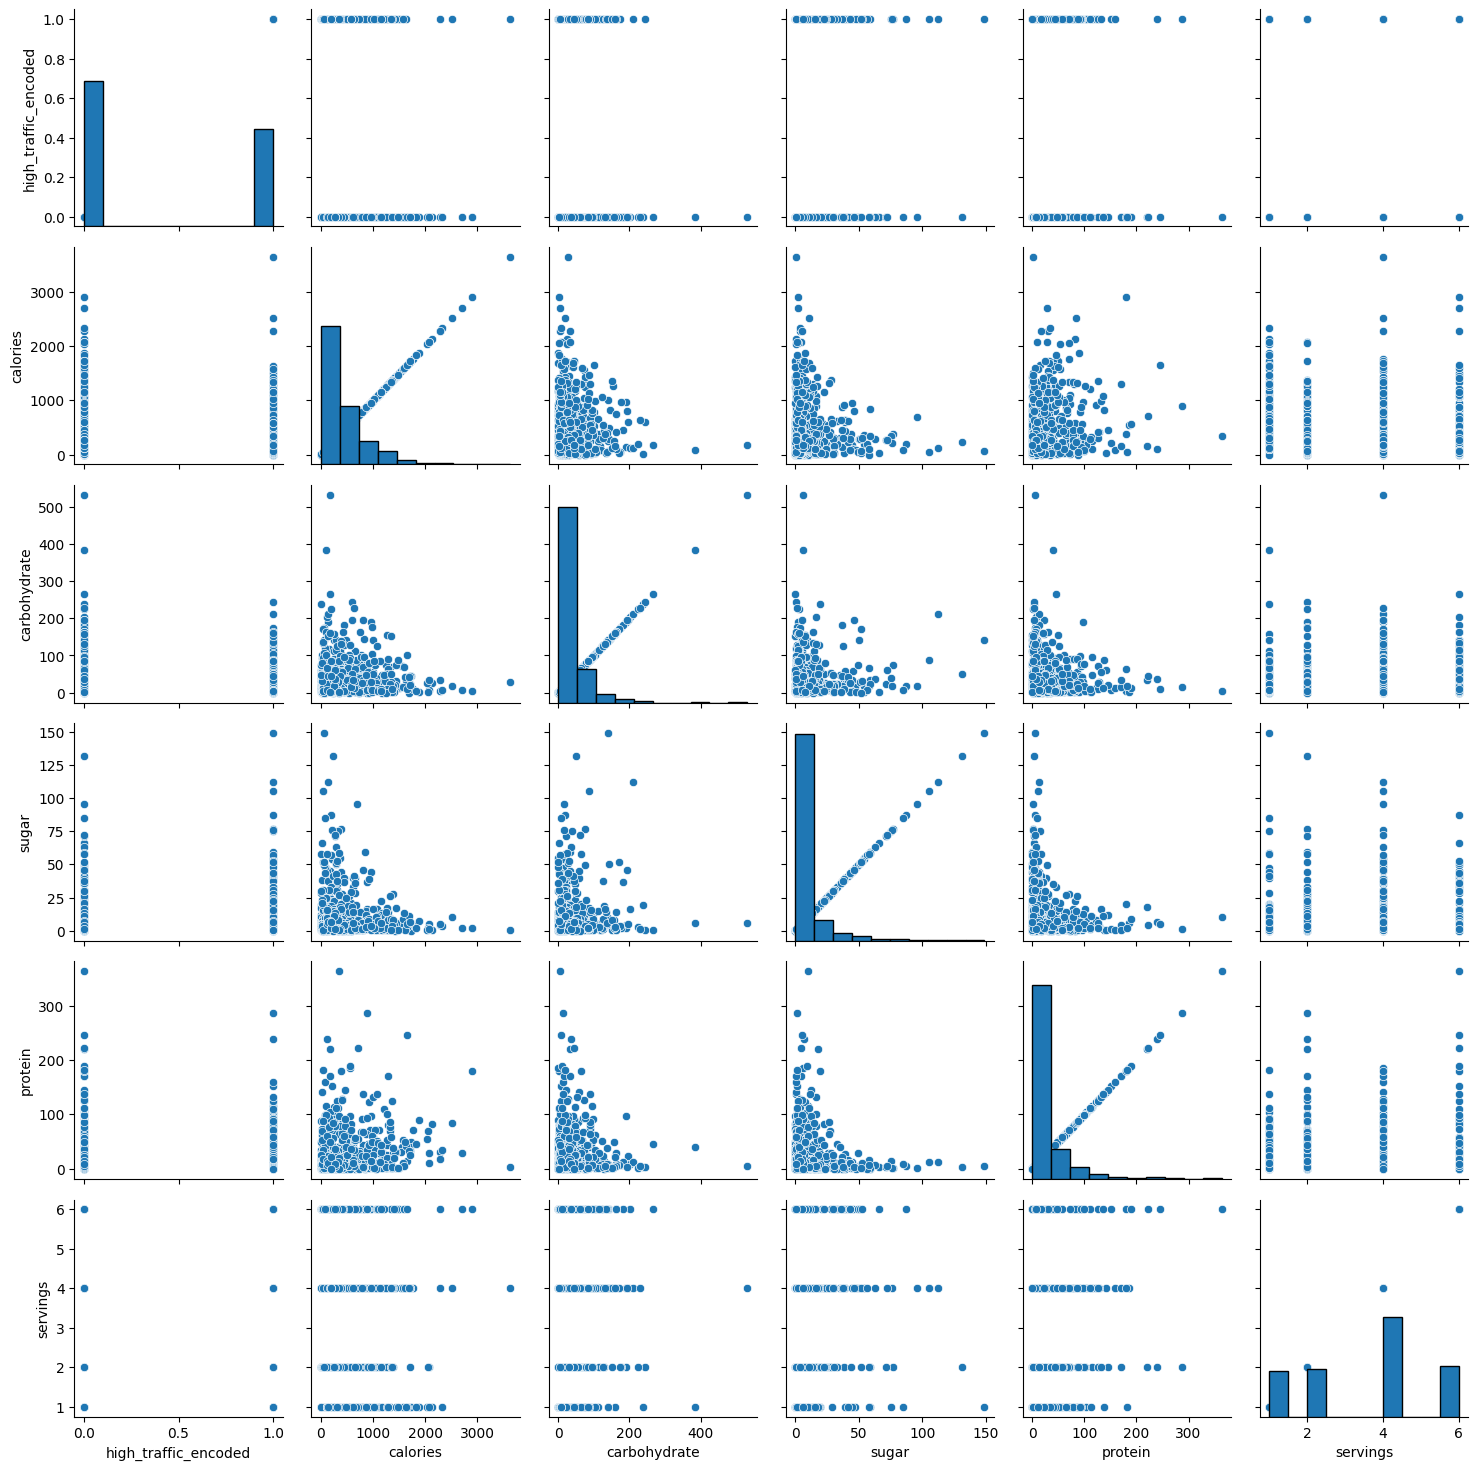

In [301]:
# Relationship between variables through scatterplots and get the distribution of each variable
g = sns.PairGrid(clean_data[['high_traffic_encoded', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings']])
g.map(sns.scatterplot)  # Use scatterplot for off-diagonal elements
g.map_diag(plt.hist, bins=10, edgecolor='black')
plt.show()

## Model Fitting and Evaluation



### Pre-processing:

#### Encode categorical variable

In [302]:
## Encode 'category' variable
clean_data = pd.get_dummies(clean_data, columns=['category'])
clean_data.shape

(895, 17)

#### Define x and y variables

In [303]:
x = clean_data.drop(columns=['high_traffic_encoded', 'recipe']) #recipe is an identifier which doesn't hold any important information for a model
y = clean_data['high_traffic_encoded']

#### Standarize variables

In [304]:
# Standardize features (transforms to zero mean and unit variance)
scaler = StandardScaler()
x = scaler.fit_transform(x)

#### Split data in train and test data sets

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 123)

### Training models and evaluate metrics

The problem presented is a **classification problem** because it has to predict wether a recipe could produce a high website traffic or not.

After training and testing different classification models, two models were selected which had a better performance using the *precision metric*:

- Decision Tree
- Random Forest

The precision metric was selected because the goal is to correctly predict high traffic recipes 80% of the time.

Precision focuses on the positive class (high traffic in this case) and tells you what proportion of predicted high-traffic recipes were actually high traffic (True positives / True Positives + False Positives). It addresses this specific goal of correctly identifying these recipes. A high precision means a smaller percentage of the "high-traffic" predictions are actually low-traffic recipes.

Additional models tested that are not included: LogisticRegression and KNN

#### Model 1: Decision Trees

In [306]:
# Model Training
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

In [307]:
# Model evaluation
def evaluation (y_predict, y_test = y_test):
  precision = precision_score(y_test, y_predict, pos_label=0) # proportion of recipes predicted as high that actually are high of all correct predictions
  return precision

precision_dt = evaluation(y_pred_dt)

print('precision DT: ', precision_dt)

precision DT:  0.8490566037735849


#### Model 2: Random Forest

In [308]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
precision_rf = evaluation(y_pred_rf)
print('precision RF: ', precision_rf)

precision RF:  0.7823529411764706


In each model, different hyperparameters values were manualy tested to identify which values were the best to achieve a better model performance:

*   For the Decision Tree model, the 'max_depth' hyperparameter of 4 (which controls the maximun depth of a decision tree) gave better precision results, compared with lower and higher values.
*   For the Random forest a hyperparameter "n_stimator" of 500 gave a better performance compared to other values.

### Results

Comparing both models, according to its precision metrics, the Random Forest model gave a 78,1% of precision and the **Decision Tree model performed better giving a 84,91% precision score.**

This means that the Decision Tree model is better for predicting if a recipe would drive higher traffic or not to the website.


#### Evaluation by business criteria

The goal of the company for this project is to increase their website traffic because that would drive an increase in subscriptions. They have found that posting a popular recipe has driven higher traffic. To replicate this user behaviour, they need to correctly predict which recipes would drive high traffic at least 80% of the time, reducing the possibility of showing unpopular recipes. As a KPI the company could consider is that: 80% of the publications of the recipes would drive an increase in the website traffic. For that, a model with a higher precision score is the best option.

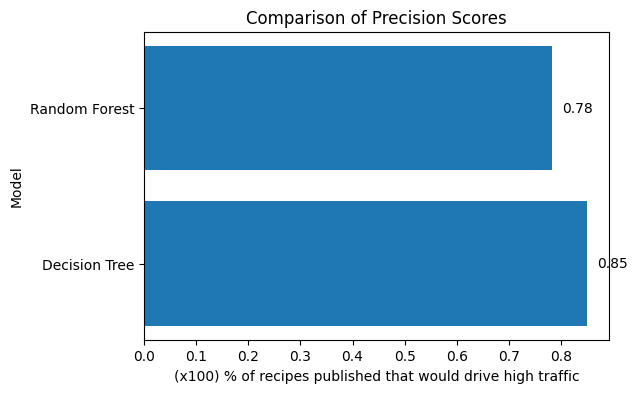

In [309]:
plt.subplots(figsize=(6,4))
bars = plt.barh(['Decision Tree', 'Random Forest'], [precision_dt, precision_rf])
# plt.bar_label([precision_dt, precision_rf])
plt.xlabel('(x100) % of recipes published that would drive high traffic')
plt.ylabel('Model')
plt.title('Comparison of Precision Scores')

for bar, value in zip(bars, [precision_dt, precision_rf]):
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(value + 0.02, y_pos, f"{value:.2f}", va='center')

# plt.xticks(rotation='vertical')
plt.show()

### Recommendation

To help the product manager of recipe discovery select the best recipes, the **Decision Tree model could be deployed into production**. It will correctly predict over 80% (~85%) of the time that the picked recipes will be classified as High, therefore attract more traffic to the website

I would recommed to test efficiency of the model in production in a two to three-month period and keep collecting data for further retraining.

These are the next steps to implement and improve the model:
1. Develop a user-friendly front-end as a web service
2. Collect data through the usage of the model for retraining
3. Measure the effectiveness of real results with the KPI defined.(80% of recipes drives high traffic)
4. Experiment with including more features and compare the precision of the models
